# Interactivity and Sharing

Welcome to the final lesson! We will learn how to do the following:

1. Use the plotly library to quickly create interactive visuals.
2. Make visuals accept user input and adjust the display.
3. Explore various ways to share Jupyter Notebooks.  

We begin by importing our Pandas and Seaborn libraries, then reading our dataset.

Don't forget to start by running the code below.

# install plotly and statsmodels
* plotly: `!pip install plotly==5.0.0`
* statsmodel: `!pip install statsmodels`

In [3]:
import pandas as pd
import seaborn as sns

tips = pd.read_csv("/content/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Interactivity via Plotly

Plotly is another graphing library that lets you create interactive visuals easily.

You will need to install the Plotly and Statsmodels libraries. You can do this through Anaconda Navigator > Environments (find Plotly and Statsmodels). Or use Terminal mode to install both.

The visual below is a sunburst(). It creates parent-child relationships that aggregates the info based on those relationships. The example below makes `sex` the parent at the center of the circle, with `time` as the child. In turn `time` has `day` as child. Each leaf in the family tree is clickable. Try hovering and clicking on each element of the sunburst to see it in action.


* [Install Plotly](https://anaconda.org/plotly/plotly)
* [Install Statsmodels](https://anaconda.org/conda-forge/statsmodels)

Learn more about Plotly here: [plotly.com](https://plotly.com)

## Interactive Regression Graph
For starters, we'll make a regression plot and then make it interactive so that when we hover over the graph, we see details in a box. Run the code below and follow the instructions.

### Instructions: hover over the following:

1. Anywhere in the graph and explore the toolbar that shows up on the top right corner. Try zoom and pan. To reset the view, double-click inside the graph OR click the home icon in the toolbar.
2. The data points - what sort of info can you read off them?
3. The trend line, which uses OLS or the ordinary least squares method for regression. What's the formula for the regression line? [Learn more about regression here](https://online.stat.psu.edu/stat462/node/101/).

In [4]:
import plotly.express as px          # Plotly Express needs the Statsmodels package

fig = px.scatter(tips,x="total_bill", y="tip", trendline="ols");
fig.show()

In [5]:
import plotly.express as px          # Plotly Express needs the Statsmodels package

fig = px.scatter(tips,x="total_bill", y="tip", trendline="ols");
fig.show()

# Sunburst( )
The sunburst visual is a multi-layer pie chart that presents the data from a hierarchical (parent-child) relationship. The size of the sectors represent the relative size of the attribute. The code contains the `path=[]` parameter which defines the hierarchy of parents to children, ie, the starting parent is the `sex` attribute, then the `time`, and `day`.  

The sunburst diagram reminds me of the polar area diagram invented by Florence Nightingale, who not only pioneered the field of nursing but also made popular the use of statistics and visualization in healthcare.

Hover and click on segments to see how the interactivity works.

In [7]:
fig = px.sunburst(tips, path=['sex', 'time', 'day'], values='tip')
fig.show()

---

### CHALLENGE:
Copy the code above into the empty code cell below and change it based on the instructions below.

1. Make the center of the circle display the day instead of sex.
2. Replace sex with table size.
3. Read more about [how to configure sunburst in plotly](https://plotly.com/python/sunburst-charts/) and experiment.

---

In [9]:
fig = px.sunburst(tips, path=['day', 'time', 'size'], values='tip')
fig.show()

<hr style="border: 1px solid silver" />

# Scatter Chart with Bubble Sizes

In the graph below, the size of the bubble represents the tip amount, so the bigger the bubble, the higher the tip.

Hover over a bubble to see additional information. Try also zooming and panning in the visual -- using the toolbar on the upper right of the graph.

To reset the view back to the original, double-click the graph.



In [10]:
fig = px.scatter(tips,
                 x="total_bill",
                 y="tip",
                 color="sex",
                 size="tip",
                 facet_col="day",
                 hover_name="day",
                 hover_data=["total_bill","size","sex","smoker"])

# Configure the hover style
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16
    )
)

fig.show()

----------
### CHALLENGE:
1. Change the facet_col parameter to render other categories like table size. What happens to the graph?
2. Change the bubble size to show the table size instead. How does this change the graph?
3. What is the hover_name parameter doing? What is the hover_data parameter specifying? Try removing them and see what happens.
4. Replace the x or y values with other attributes in the dataset. What changed in your visual?
5. Play around with the .update_layout() parameters. What do they control?
----------

# Levelling Up with Widgets

You can make Python notebooks more interactive by taking in user input using textboxes, sliders, dropdowns, and checkboxes -- and then redraw the visual based on that input. We call these input thingies **widgets**. To use widgets, you will need to [install the ipywidgets library](https://anaconda.org/conda-forge/ipywidgets).

You will also need a bit more in-depth knowledge of Python programming, namely, how to create and use functions. This is beyond the scope of this course, but you can start playing around with interactivity by using the code example below. We only used 7 lines of code and we get an interactive visual!

The code will gives you two dropdown boxes which gives you a choice of what to plot in the x-axis and whether you want to show a violin or box plot.  

The best way to start understanding the code is to first try out the graph. Change the values in the dropdown boxes and see the results change.

Then, read the explanations of the code, after the visual itself.

interactive(children=(Dropdown(description='x_axis', options=('time', 'day', 'size'), value='time'), Dropdown(…

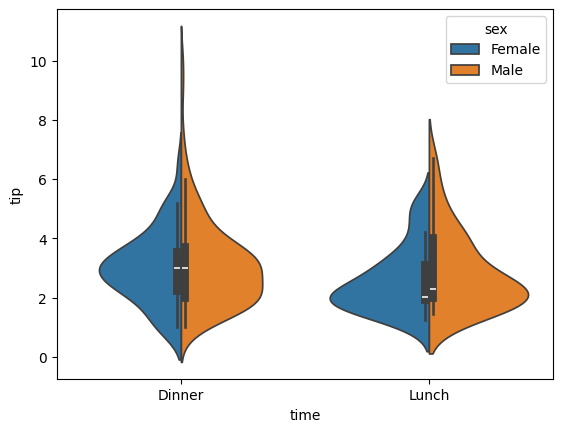

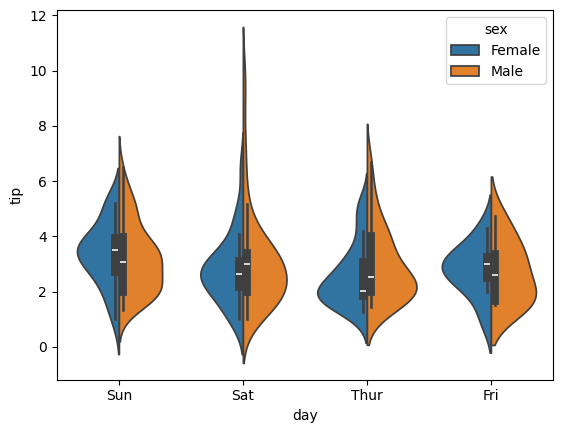

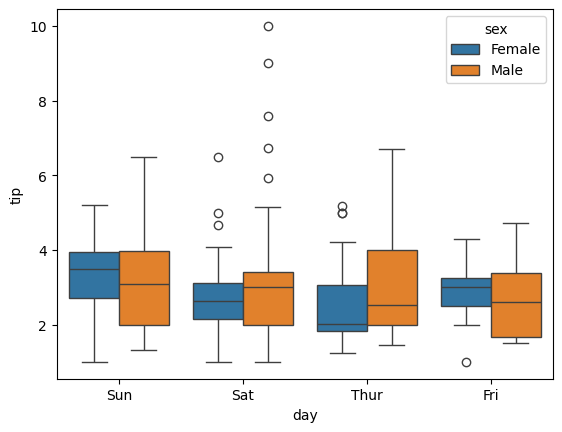

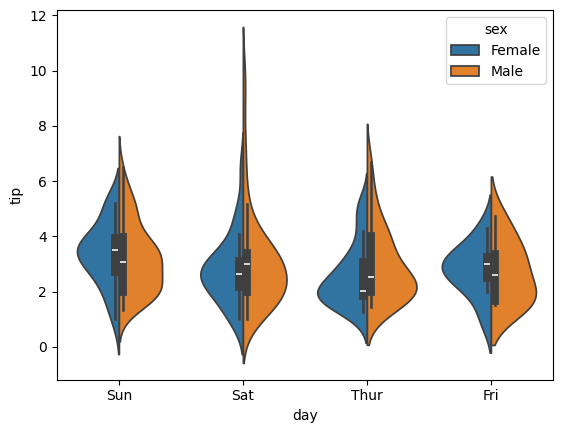

In [11]:
from ipywidgets import interact

@interact(x_axis=['time', 'day', 'size'], plot_type=['violin','box'])
def show_graph(x_axis, plot_type):
    if plot_type == 'violin':
        sns.violinplot(data=tips, x=x_axis, y="tip", hue="sex", split=True);
    elif plot_type == 'box':
        sns.boxplot(data=tips, x=x_axis, y="tip", hue="sex");

## Explanation

Each line of code is numbered using a comment to the right. The explanation number below corresponds to the line number code comments above.

```python
from ipywidgets import interact
```

* **LINE 1.** We import the ipywidgets library, specifically the `interact` module. Be sure you have installed it. [Here's how to install ipywidgets](https://anaconda.org/conda-forge/ipywidgets)

```python
@interact(x_axis=['time', 'day', 'size'], plot_type=['violin','box'])
```

* **LINE 3.** We use the `interact()` module, and we define 2 parameters, `x_axis` and `plot_type`.
  
  * The parameters contain the choices you will offer to the user, and these choices are enclosed between the square brackets [ ].
  * Note that the choices in the square brackets are strings, enclosed in single quotes. `interact` will automatically insert these possible values into the widgets. It even chose the widget for us: dropdown boxes. Learn more about [ipywidgets here](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html).
  * The choices in Line 2 are called arrays. [Learn more about arrays here](https://www.w3schools.com/python/python_arrays.asp).

```python
def show_graph(x_axis, plot_type):
```

* **LINES 4-8.** This block of code is the function. The name of the funciton is `show_graph()`. It accepts two parameters: `x_axis` and `plot_type`, which we discussed in line 2. The value of `x_axis` determines which points to plot in the x-axis and `plot_type` determines whether to display a violin or box plot. The following are details of the function.

  * **LINE 4.** `def` is the Python keyword that creates the function. It's followed by the name of the function, `show_graph()`.
  * **LINES 5 and 7.** If the value of `plot_type` is `'violin'`, then plot a violin. If it's `'box'` then draw a box plot. Learn more about [If...Else statements here](https://www.w3schools.com/python/python_conditions.asp)
  * **LINES 6 and 8.** These draw the actual visuals -- a violin plot or a box plot, depending on the conditions defined in the `if` and `elif` statements in lines 4 and 5.


To **learn more about functions**, start with this [tutorial from W3Schools](https://www.w3schools.com/python/python_functions.asp).


---
### CHALLENGE


1. Add a new option to `x_axis`: smoker
2. Add a new category plot_type (pick your own) and make it work. [More category plot types here](https://seaborn.pydata.org/tutorial/categorical.html)

---

---
# Sharing Notebooks

Jupyter is popular because it makes sharing your visuals and findings easier. Here are ways to share your notebooks:

1. Share the .ipynb file itself so anyone running Jupyter can open it, install the needed libraries, and run the notebook.
2. Download it as HTML, markdown, and other formats. Click File > Download as... and see the formats available.
3. PDF export is also available but you need to install additional libraries. Click File > Download as... and choose the options for downloading as PDF.
3. Through notebook sharing sites like Kaggle.com. Kaggle is devoted mostly to public sharing, so that may not be ideal for private data. For private sharing, try Google Colab, which works a bit like Google Doc but for Jupyter Notebooks.
4. By setting up an Intranet or Cloud server using JupyterHub. To read more about this, visit [the Jupyter Hub Project](https://jupyter.org/hub).
---

# Conclusion

And that's it for the Data Visualization course. We've done quite a lot:

1. How to create visuals, maps, dashboards, and stories to facilitate data analytics.
2. How to explore dimensions and find patterns and trends by using various visuals.
3. How to make and use interactive visuals and share them.

And we learned to do all of that using Tableau and Jupyter Notebook. I congratulate you for going through the lessons and challenges and may you always stay curious!

---